In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Load e formatação dos dados

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['especie'] = iris.target

Descrição do dataset iris

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Correlação dos atributos

<Axes: >

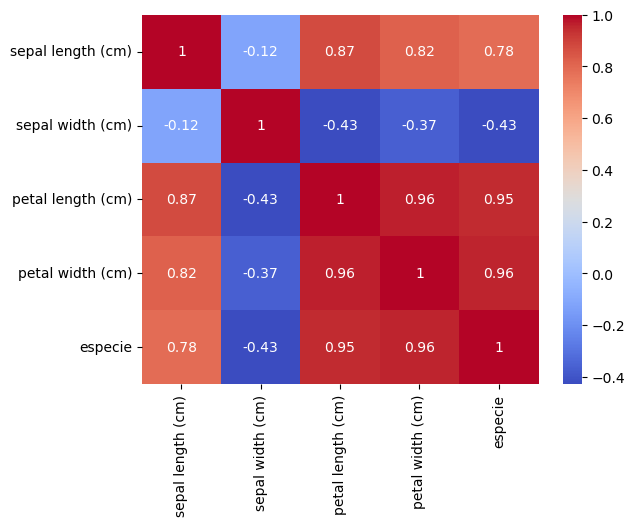

In [4]:
correlacao = df.corr()
sns.heatmap(correlacao,annot=True,cmap='coolwarm')

Distribuição das especies

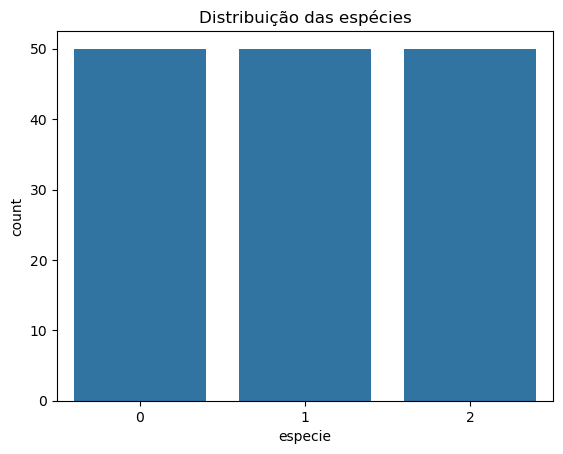

In [5]:
sns.countplot(x=df['especie'], data=df)
plt.title("Distribuição das espécies")
plt.show()

Relações de dispersão das especies pela largura e comprimento das sépalas bem como largura e comprimento das pétalas,
note as distribuições das features por especies na diagonal.

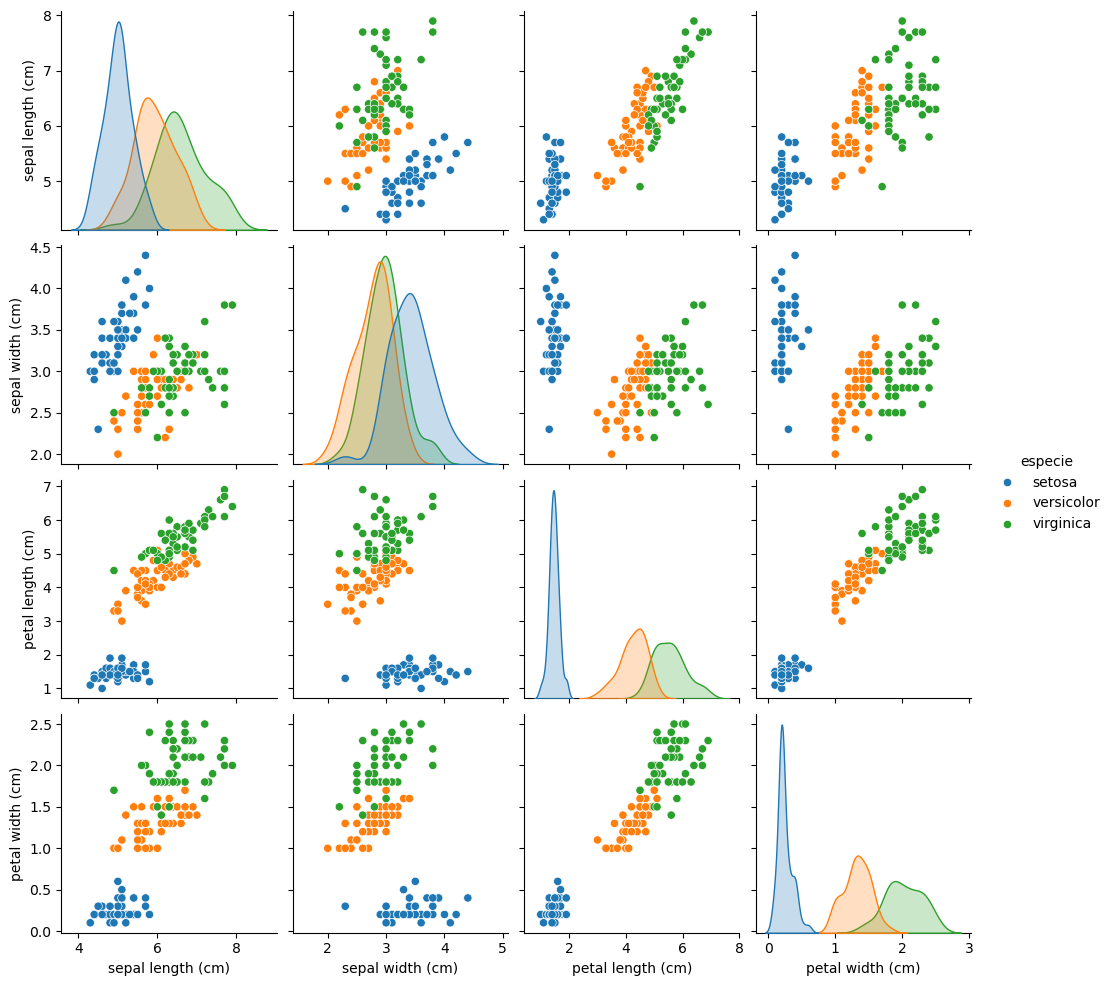

In [6]:
df['especie'] = df['especie'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
sns.pairplot(df,hue = 'especie');

Distribuição dos dados para treinamento com estratificação

In [25]:
dados = df.drop(['especie'], axis = 1)
respostas= df['especie']
dados_treino,dados_teste,resposta_treino,resposta_teste = train_test_split(dados, respostas, test_size=0.3,stratify=respostas)

Declaração e treinamento das IAs

In [26]:
pipe_knn = Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=5))])
pipe_lr  = Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000))])
models = {"KNN": pipe_knn, "LogReg": pipe_lr}
pipe_knn.fit(dados_treino,resposta_treino)
pipe_lr.fit(dados_treino,resposta_treino);

Previsões e avaliações das IAs em uma instancia

In [29]:
resposta_knn = pipe_knn.predict(dados_teste)
resposta_logistic = pipe_lr.predict(dados_teste)
print(f"    KNN\n{classification_report(resposta_teste, resposta_knn)}")
print(f"Regressão logística\n{classification_report(resposta_teste, resposta_logistic)}")

    KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Regressão logística
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Matriz de confusão

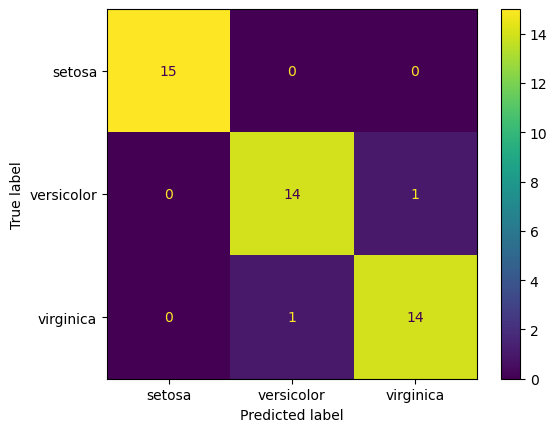

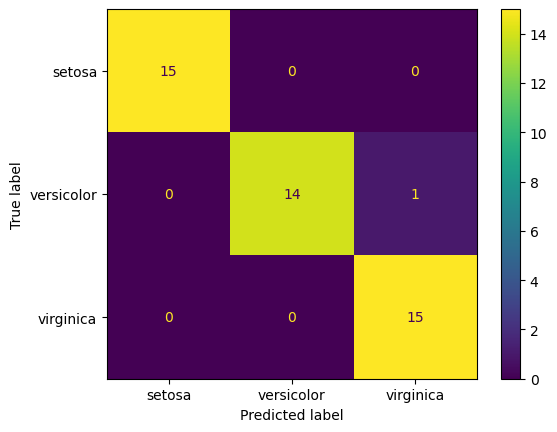

In [17]:

matriz_k = confusion_matrix(resposta_teste,resposta_knn)
matriz_r = confusion_matrix(resposta_teste,resposta_logistic)
grafk = ConfusionMatrixDisplay(matriz_k,display_labels= load_iris().target_names)
grafk.plot()
grafr = ConfusionMatrixDisplay(matriz_r,display_labels= load_iris().target_names)
grafr.plot();

accuracy_score para N interações

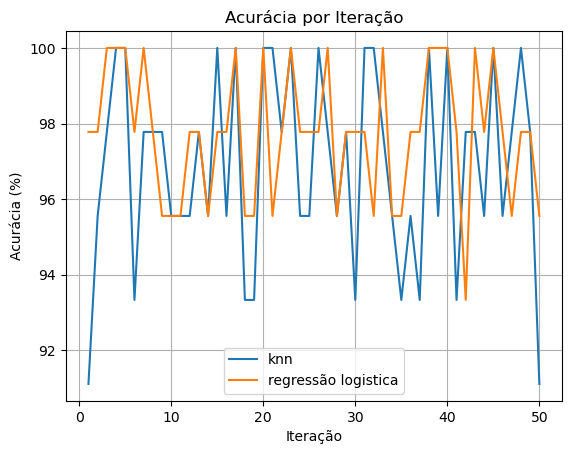

In [19]:
acuracias = {
        "knn" : [],
        "log_r" : []
    }
for _ in (range(50)):
    dados_treino,dados_teste,resposta_treino,resposta_teste = train_test_split(dados, respostas, test_size=0.3)
    resposta_knn = pipe_knn.predict(dados_teste)
    resposta_logistic = pipe_lr.predict(dados_teste)
    acuracias["knn"].append(accuracy_score(resposta_teste,resposta_knn)*100)
    acuracias["log_r"].append(accuracy_score(resposta_teste,resposta_logistic)*100)
acc = pd.DataFrame(acuracias)
x = range(1,len(acc)+1)
sns.lineplot(data=acc, x= x, y= 'knn',markers="o",label = "knn");
sns.lineplot(data=acc, x= x, y= 'log_r',markers="s",label = "regressão logistica");
plt.xlabel("Iteração")
plt.ylabel("Acurácia (%)")
plt.title("Acurácia por Iteração")
plt.grid(True)
plt.legend()
plt.show();
   

Médias

In [30]:
medk = acc['knn'].mean()
medl = acc['log_r'].mean()
print(f"Média knn: {medk:.2f}%")
print(f"Média regressão logistica: {medl:.2f}%")


Média knn: 96.89%
Média regressão logistica: 97.73%
